In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [7]:
(X_train, Y_train) , (X_test , Y_test) = mnist.load_data(path="mnist.np2")

In [8]:
type(X_train)

numpy.ndarray

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
Y_train.shape

(60000,)

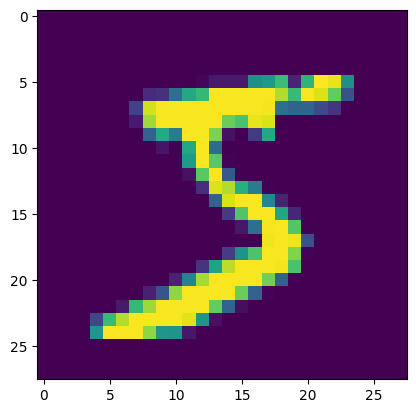

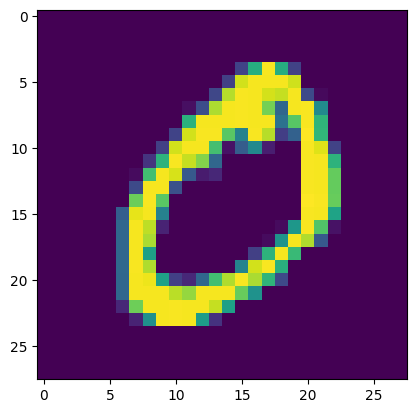

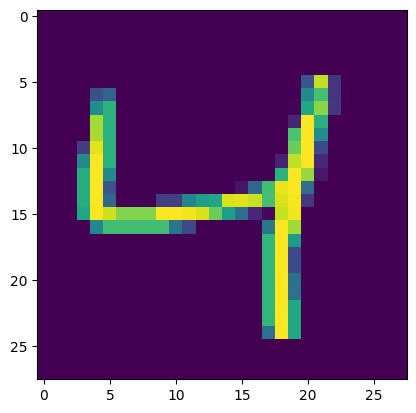

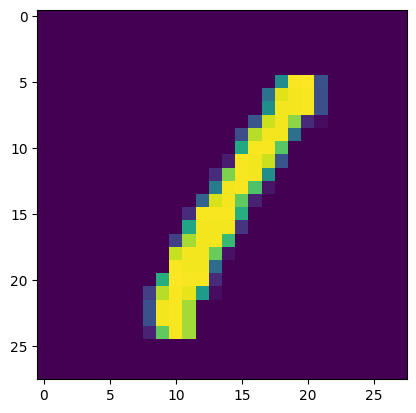

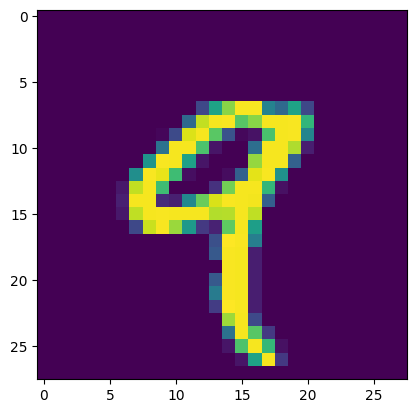

In [11]:
for i in range(0 , 5):
    plt.imshow(X_train[i])
    plt.show() #If this line is not used, only last plot will be shown  

**Finding unique values from labels**

In [12]:
t = np.unique(Y_train)
print(t)
t = np.unique(Y_test)
print(t)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Normalizing values(values become 0 to 1 for efficient calculation)**

In [13]:
X_test = X_test/255
X_train = X_train/255

In [16]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Using ANN**

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # MNIST dataset images are 28×28 pixels (grayscale)
    
    # ReLU activation is used in hidden layers because it avoids the vanishing gradient problem 
    keras.layers.Dense(50, activation='relu'),  # 1st hidden layer with ReLU activation
    keras.layers.Dense(50, activation='relu'),  # 2nd hidden layer with ReLU activation
    
    # Softmax is typically used for multi-class classification, but sigmoid is used here
    keras.layers.Dense(10, activation='sigmoid')  # Output layer for 10 classes
])


**Compiling neural network using loss function**

In [18]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [19]:
#training data
model.fit(X_train , Y_train, epochs = 15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8509 - loss: 0.5357
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9545 - loss: 0.1552
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9678 - loss: 0.1105
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9743 - loss: 0.0864
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9781 - loss: 0.0707
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0591
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9850 - loss: 0.0488
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0439
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0365
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0319
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0317
Epoch 12/15
1875/1875 ━━━━━━━━

In [20]:
#test data
loss , accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9660 - loss: 0.1691


In [21]:
X_test.shape

(10000, 28, 28)

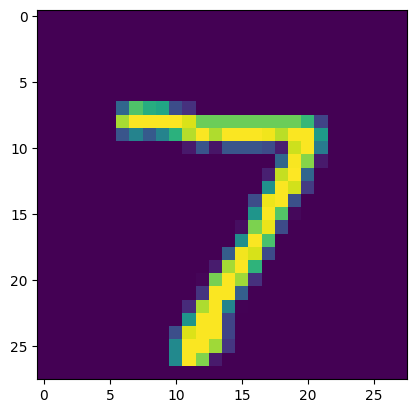

In [22]:
plt.imshow(X_test[0])

In [23]:
Y_test[0]

7

In [24]:
Y_pred = model.predict(X_test) #predict function predicts probability for each class

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Converting the prediction probability to class label**

In [25]:
label_for_first_image = np.argmax(Y_pred[0]) #argmax prints the maximum valued index
label_for_first_image

7

In [26]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [27]:
conf_mat = confusion_matrix(Y_test , Y_pred_labels) #First angument is Y axis and second argument is X_axis

In [28]:
print(conf_mat)

tf.Tensor(
[[ 955    0    1    1    2    3    6    2    2    8]
 [   1 1116    0    6    1    1    3    1    6    0]
 [   5    1  994    5    1    1    6    3   14    2]
 [   0    0    5  974    4   10    0    2    7    8]
 [   1    0    5    0  958    2    7    1    0    8]
 [   2    0    1   11    1  868    2    0    5    2]
 [   3    2    3    1    9   10  927    0    3    0]
 [   0    4   10    9    6    0    0  975    5   19]
 [   4    0    3    5    7    4    3    4  940    4]
 [   0    2    0    3   22    4    0    4    4  970]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

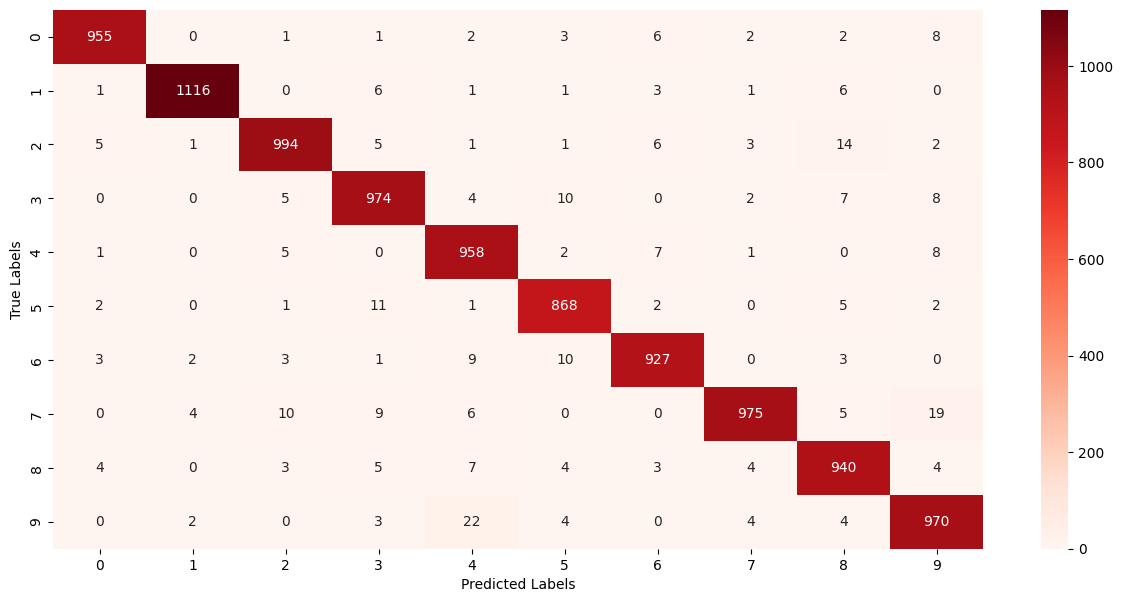

In [29]:
plt.figure(figsize = (15 , 7))
sns.heatmap(conf_mat , annot = True , fmt = 'd', cmap='Reds') #conf mat is the data needed, annotation is the values be visible or not, fmt is the number type: decimal or binary
#in fmt if d is used, it shows data in integer, if 2% is used it shows in binary
#cmap is the number limit, if the color is darker it  means it has more data. s must be added after every color
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a predicting system**

In [30]:
input_img = cv2.imread('/kaggle/input/input-img/Handwritten-digits-from-the-MNIST-data-set-5-If-f-denotes-the-image-of-the-handwritten.png')

In [31]:
type(input_img)

numpy.ndarray

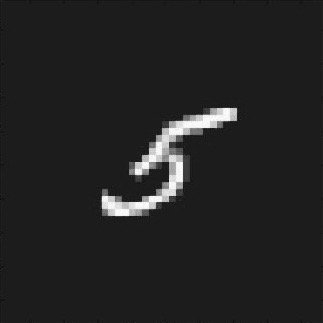

In [32]:
cv2_imshow(input_img)

In [33]:
input_img.shape

(323, 323, 3)

In [34]:
grayscale_img = cv2.cvtColor(input_img , cv2.COLOR_RGB2GRAY)

In [35]:
grayscale_img.shape

(323, 323)

In [36]:
grayscale_img_resized = cv2.resize(grayscale_img, (28 , 28))

In [37]:
grayscale_img_resized.shape

(28, 28)

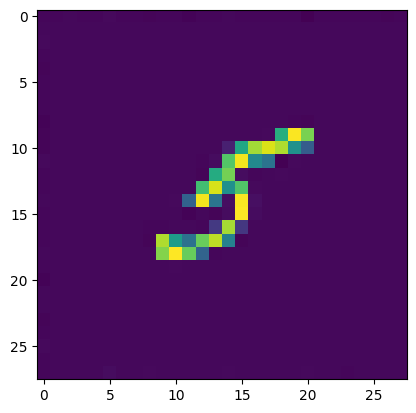

In [38]:
plt.imshow(grayscale_img_resized) #matplot library helps to show 

In [39]:
cv2_imshow(grayscale_img_resized)

In [40]:
grayscale_img_resized = grayscale_img_resized / 255

In [41]:
grayscale_img_resized = np.reshape(grayscale_img_resized , [1 , 28 , 28])

In [68]:
input_prediction = model.predict(grayscale_img_resized)
input_prediction = np.argmax(input_prediction)
print("The prediction is:" , input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The prediction is: 3


Predicted wrong :"(

**Automatic Predictive System**

In [64]:
input_img = cv2.imread('/kaggle/input/csvvvvv/MNIST.png')
grayscale_img = cv2.cvtColor(input_img , cv2.COLOR_RGB2GRAY)
grayscale_img_resized = cv2.resize(grayscale_img, (28 , 28))
grayscale_img_resized = grayscale_img_resized / 255
grayscale_img_resized = np.reshape(grayscale_img_resized , [1 , 28 , 28])
input_prediction = model.predict(grayscale_img_resized)
input_prediction = np.argmax(input_prediction)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3


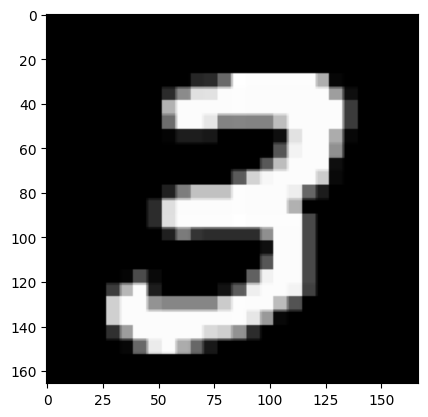

In [65]:
plt.imshow(input_img)

In [67]:
print("The image is predicted as:" , input_prediction)

The image is predicted as: 3
